In [20]:
# This file was taken to be taught in the class Section 7A
# File source: Ses7A_Cars_Classify_TFLite.ipynb
# Car dataset is downloaded from the website below.
# https://archive.ics.uci.edu/dataset/19/car+evaluation
# Keep the car.data file downloaded, in the same directory as this ipynb file

# Classification model using TF 2.0 to model the usefulness of cars 
# Ref: https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
# Data files of cars: https://archive.ics.uci.edu/dataset/19/car+evaluation
# Ref2 Book: Giancarlo Zaccone, Getting Started with TensorFlow-Packt Publishing (2016)
# Chapter 3 on Classifiers 
import pandas as pd
import numpy as np
# Ref for matplotlib: https://www.tutorialspoint.com/matplotlib/index.htm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [21]:
# Different categorical values of each of the 7 attributes are given below, in total 21
# CAUTION:
# Categorical details given in the downloaded file cars.names are not correct. Use car.data instead.
# These following values were got by rurnning the 
# following command, using .head() on each of the below categories
# Datal cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

# Individual attribute values are given as below:
#  buying price  high, low, med, vhigh
#  maint         high, low, med, vhigh
#  doors         2, 3, 4, 5-more
#  persons       2, 4, more
#  lug_capacity  big, med, small
#  safety        high, low, med
# Output Categories are: acc, good, unacc, v-good
# Output categoircal values are: (any of the four values)
# "unacc" (unacceptable), "acc" (acceptable), good, and very good
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

# Import the CSV file to Panda's DataFrame format.
cars = pd.read_csv(r'car.data', names=cols, header=None)
print(cols)
print(cars) # A DataFrame object

['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
      price  maint  doors persons lug_capacity safety output
0     vhigh  vhigh      2       2        small    low  unacc
1     vhigh  vhigh      2       2        small    med  unacc
2     vhigh  vhigh      2       2        small   high  unacc
3     vhigh  vhigh      2       2          med    low  unacc
4     vhigh  vhigh      2       2          med    med  unacc
...     ...    ...    ...     ...          ...    ...    ...
1723    low    low  5more    more          med    med   good
1724    low    low  5more    more          med   high  vgood
1725    low    low  5more    more          big    low  unacc
1726    low    low  5more    more          big    med   good
1727    low    low  5more    more          big   high  vgood

[1728 rows x 7 columns]


In [22]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [23]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 10 #8
plot_size [1] = 10 #6
plt.rcParams["figure.figsize"] = plot_size

<Axes: ylabel='count'>

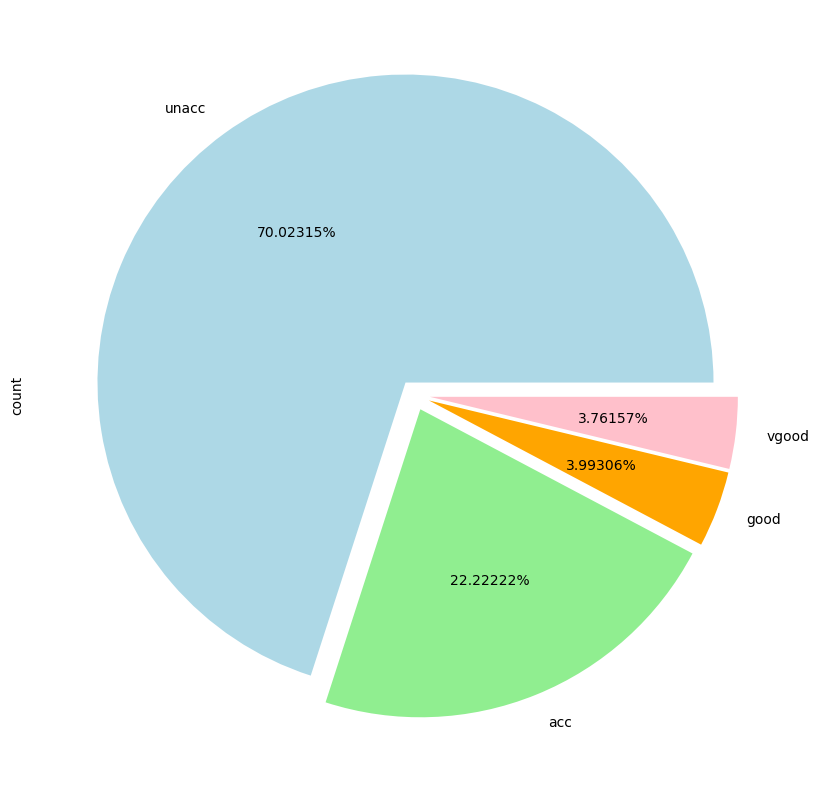

In [24]:
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', \
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'], \
                                explode=(0.05, 0.05, 0.05,0.05))

In [25]:
# Convert categorical variable into dummy/indicator variables.
price = pd.get_dummies(cars.price, prefix='price')
print(price)
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

      price_high  price_low  price_med  price_vhigh
0          False      False      False         True
1          False      False      False         True
2          False      False      False         True
3          False      False      False         True
4          False      False      False         True
...          ...        ...        ...          ...
1723       False       True      False        False
1724       False       True      False        False
1725       False       True      False        False
1726       False       True      False        False
1727       False       True      False        False

[1728 rows x 4 columns]


In [26]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
print(X.shape)
print(X)

(1728, 21)
      price_high  price_low  price_med  price_vhigh  maint_high  maint_low  \
0          False      False      False         True       False      False   
1          False      False      False         True       False      False   
2          False      False      False         True       False      False   
3          False      False      False         True       False      False   
4          False      False      False         True       False      False   
...          ...        ...        ...          ...         ...        ...   
1723       False       True      False        False       False       True   
1724       False       True      False        False       False       True   
1725       False       True      False        False       False       True   
1726       False       True      False        False       False       True   
1727       False       True      False        False       False       True   

      maint_med  maint_vhigh  doors_2  doors_3  ... 

In [27]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [28]:
price.head()

,price_high,price_low,price_med,price_vhigh
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [29]:
maint.head()

,maint_high,maint_low,maint_med,maint_vhigh
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [30]:
doors.head()

,doors_2,doors_3,doors_4,doors_5more
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [31]:
persons.head()

,persons_2,persons_4,persons_more
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [32]:
lug_capacity.head()

,lug_capacity_big,lug_capacity_med,lug_capacity_small
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [33]:
safety.head()

,safety_high,safety_low,safety_med
0,False,True,False
1,False,False,True
2,True,False,False
3,False,True,False
4,False,False,True


In [34]:
y = labels.values
print(y)

[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False False  True False]
 [False  True False False]
 [False False False  True]]


In [35]:
from sklearn.model_selection import train_test_split

print(X.shape)
print(y.shape)

# The total data in the dataset is 1728, 20% of them is: 346 (no. of test data)
# Size of train data: 1728 - 346 = 1382
# random_state is a seed. It can be any value. If we keep it same on every
# run, then there will be repeatability in the results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42)
print('Shape of X_train and X_test:', X_train.shape, X_test.shape)
print('Shape of y_train and y_test:', y_train.shape, y_test.shape)

(1728, 21)
(1728, 4)
Shape of X_train and X_test: (1382, 21) (346, 21)
Shape of y_train and y_test: (1382, 4) (346, 4)


In [36]:
# Define the number of nodes in each layer of the network
# Layer1 with 24 and Layer2 with 16 nodes is better than 16 and 24 respectively.
DENSE1_SIZE = 15
DENSE2_SIZE = 10
NUM_OF_EPOCHS = 50 # Simple model so no need to train for long 
BATCH_SIZE = 8

model = tf.keras.Sequential()
# Cars_dataset: Column feature values:
# ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
# Due to hot encoding the inputs for each category dependes on no. of 
# Different categories defined for each feature.
# So, the total categories are: 4 + 4 + 4 + 3 + 3 + 3 = 21 inputs
input_shape = X.shape[1]
print(input_shape)
model.add(tf.keras.layers.Flatten(input_shape =(X.shape[1],)))
# if DENSE1_SIZE = 15, total no. of params: 15*21 weights = 315 + 15 biases=330 
model.add(tf.keras.layers.Dense(DENSE1_SIZE, activation='relu'))
# if DENSE2_SIZE = 10, total no. of params: 10*15 weights = 150 + 10 biases=160 
model.add(tf.keras.layers.Dense(DENSE2_SIZE, activation='relu'))
# Output labels: acc, good, unacc, vgood
# So, no. of output categories = 4
# if DENSE2_SIZE = 10, total no. of params: 10*4 weights = 40 + 4 biases = 44 
output_shape = y.shape[1]
print(output_shape)
model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))

# Adam: Adaptive Moment Estimator (a stochastic optimization algorithm)
# Which maintains per parameter leraning rate (LR) using momemnts (rate of change of LR)
# Useful in the system where the classification features are more and noisy
# Ref: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
# Crossentropy loss fn is used when there are two or more label classes.
# The labels are expected to be provided in a one_hot representation.
# One hot encoding: It represents categorical variables as binary vectors.
# To represent a particular label, mark it as 1 and all other labels as zeros
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

21
4


d:\opt\WingetApps_Ddrive\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None


In [38]:
# With epchs 50, the output results where not matching with the expected results
# No need to make those changes because accuracy is achieved with the initial values itself
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, 
                    epochs=NUM_OF_EPOCHS,
                    verbose=1, validation_split=0.2)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.6382 - loss: 1.0479 - val_acc: 0.6534 - val_loss: 0.8479
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7338 - loss: 0.6532 - val_acc: 0.6643 - val_loss: 0.6680
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7658 - loss: 0.5195 - val_acc: 0.7653 - val_loss: 0.5044
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8329 - loss: 0.3960 - val_acc: 0.8159 - val_loss: 0.4195
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8689 - loss: 0.3293 - val_acc: 0.8159 - val_loss: 0.3722
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8951 - loss: 0.2701 - val_acc: 0.8592 - val_loss: 0.3186
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9108 - loss: 0.2409 - val_acc: 0.8845 - val_loss: 0.2837
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9268 - loss: 0.2062 - val_acc: 0.8881 - val_loss: 0.2583
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [39]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9578 - loss: 0.1122 
Test Score: 0.0877051129937172
Test Accuracy: 0.97398841381073


In [40]:
# Trying out saving the model in h5 file format
# Ref: https://www.tensorflow.org/tutorials/keras/save_and_load
# We have the model object that needs to be saved
# It save text file with Hex numbers in HDF5 format in the current dir
# This model file has a size of 39.52 KB
model.save('CarsClassifyModel.h5')

In [41]:
def representative_dataset():
    for _ in range(100):
      data =  X_test
      yield [data.astype(np.float32)]
        
print(representative_dataset())

<generator object representative_dataset at 0x000002309854E6C0>


In [43]:
i = 0
for _ in representative_dataset():
    print(i)
    # print(_)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [2]:
import tensorflow as tf
# Converting a tf.Keras model to a TensorFlow Lite model.
# It is preferred to use TFLiteConverter from saved model and then
# Also provide representative dataset to train the converted TFLite model
# Avoid calling the TFLite converter directly from model
#converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf.saved_model.save(model, "saved_cars_seq_model_keras_dir")
converter = tf.lite.TFLiteConverter.from_saved_model("saved_cars_seq_model_keras_dir")

# Though its size is not much, optimizer is used here to check whether it works on ESP32
# if this is chosen, tf.lite.Optimize.OPTIMIZE_FOR_SIZE, the TFLite does not work on ESP32
# Observed that even with Optimize.DEFAULT the TFLite model does not work on ESP32
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

tflite_model = converter.convert()

NameError: name 'model' is not defined

In [47]:
# Save the model in TFlite format whose size is just 5 KB
# It brings down the size from 49.52 KB to 3.836 KB, 13 times reduction
with open('CarsClassifyModel.tflite', 'wb') as f:
  f.write(tflite_model)

In [48]:
# Run the inference on TFLITE model on Python ... here itself first
# Let us now first try to run this tflinte model on Python itself
# Ref: https://www.tensorflow.org/lite/guide/inference
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="CarsClassifyModel.tflite")
interpreter.allocate_tensors()

In [49]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_flatten_input:0', 'index': 13, 'shape': array([ 1, 21]), 'shape_signature': array([-1, 21]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([1, 4]), 'shape_signature': array([-1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [50]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
#print(input_shape)
#print(type(X_test))
#print(X_test.iloc[1])
#print(X_test.iloc[0])
input0_data = np.random.random_sample(input_shape)
print(input0_data)
input0_data = np.array(input0_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input0_data)

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output0_data = interpreter.get_tensor(output_details[0]['index'])
print(output0_data)

# Verify if the same data is given to the original model what is the output
output0_data = model.predict(input0_data)
print(output0_data)

# ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
#  File: car_dataset.csv:Line no. 1226: med low 3 4  small med acc : Input1
input1_data = [[  0.0, 0.0, 1.0, 0.0, 
                  0.0, 1.0, 0.0, 0.0, 
                  0.0, 1.0, 0.0, 0.0, 
                  0.0, 1.0, 0.0,
                  0.0, 0.0, 1.0,
                  0.0, 0.0, 1.0]]
print(input1_data)
input1_data = np.array(input1_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input1_data)

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output1_data = interpreter.get_tensor(output_details[0]['index'])
print('output1:')
print(output1_data)

# Verify if the same data is given to the original model what is the output
output1_data = model.predict(input1_data)
print(output1_data)

# ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
# File: car_dataset.csv:Line no. 1236: med  low 3 more  small high   : Input2
input2_data = [[  0.0, 0.0, 1.0, 0.0, 
                  0.0, 1.0, 0.0, 0.0, 
                  0.0, 1.0, 0.0, 0.0, 
                  0.0, 0.0, 1.0,
                  0.0, 0.0, 1.0,
                  1.0, 0.0, 0.0]]
print(input2_data)
input2_data = np.array(input2_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], tf.Variable(input2_data))

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output2_data = interpreter.get_tensor(output_details[0]['index'])
print('output2:')
print(output2_data)

# Verify if the same data is given to the original model what is the output
output2_data = model.predict(input2_data)
print(output2_data)


[[0.38960262 0.89126706 0.56316009 0.76048594 0.89058592 0.14020703
  0.30962536 0.25300336 0.26011876 0.01577992 0.75931816 0.62296717
  0.75740664 0.42243973 0.42930552 0.54902127 0.33060726 0.67691043
  0.8444294  0.82410065 0.31536731]]
[[0.         0.         0.99609375 0.        ]]
[[5.8908996e-19 1.0074544e-31 1.0000000e+00 0.0000000e+00]]
[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]]
output1:
[[0.96875    0.00390625 0.02734375 0.        ]]
[[9.6872610e-01 3.2621780e-03 2.8011711e-02 1.6597566e-08]]
[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]]
output2:
[[0.046875  0.9453125 0.        0.0078125]]
[[3.8167920e-02 9.5608318e-01 3.5785532e-04 5.3909849e-03]]


In [51]:
# Function to convert some hex values into an array for C programming
import time, sys

# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Mouli Sankaran \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'
    
# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n'      
    
    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [52]:
# Write TFLite model to a C source (or header) file
with open("cars_model_esp32" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "cars_model_esp32"))

This model data was generated on: Wed Sep 25 16:13:35 2024
Tools used: Python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)] 
 Numpy: 1.19.5 
 TensorFlow: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)] 
 Keras:  2.4.0 


